In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

### Importing Data

In [2]:
data = pd.read_csv('Heart_Disease_Dataset.csv')
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### part(آ)

size of dataset ==  1190
number of Nan values ==  0
class 1 has  629  sampels and class 0 has  561  sampels.


<Axes: xlabel='sex', ylabel='Count'>

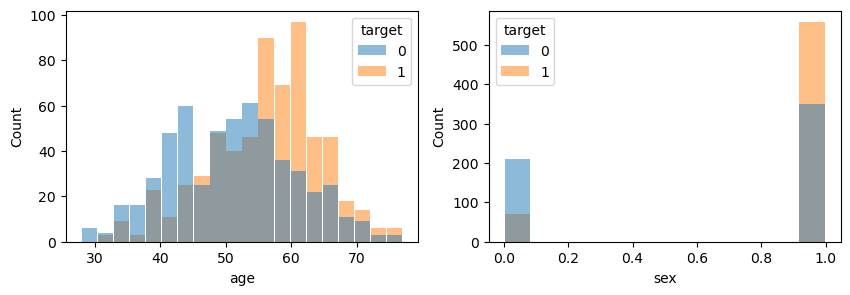

In [3]:
n = len(data)
print("size of dataset == ", n)

N_Nan = data.isna().sum().sum()
print("number of Nan values == ", N_Nan)

N_1 = (data["target"] == 1).sum()
N_2 = (data["target"] == 0).sum()
print("class 1 has ", N_1, " sampels and class 0 has ", N_2, " sampels.")

fig, ax = plt.subplots(1,2, figsize=(10, 3))
sns.histplot(data= data, x= "age", hue="target", ax=ax[0], edgecolor=None, shrink=0.95)
sns.histplot(data= data, x= "sex", hue="target", ax=ax[1], edgecolor=None, shrink=0.95)

در سلول زیر داده های کتگوریکال و عددی را شناسایی واز هم جدا کردیم.همچنین داده های کتگوریکال را به دوبخش باینری و غیرباینری تقسیم کردیم.

In [4]:
cat_features = []
numeric_features = []
binary_features = []
nonbinary_cat_features = []
for feature in data.columns:
    if(feature == "target"):
        continue
    cats = set(list(data[feature]))
    if(len(cats)<5):
        cat_features.append(feature)
        if(len(cats) == 2):
            binary_features.append(feature)
        else:
            nonbinary_cat_features.append(feature)
    else:
        numeric_features.append(feature)

### part(ب)
<div dir="rtl"> <font size="4" face="HM XNiloofar">
با استفاده از z-test داده های پرت تمام ویژگی های عددی را حذف کردیم.
</font> </div>

In [5]:
data_numeric = data[numeric_features]
mean = data_numeric.mean()
std_div = np.sqrt(data_numeric.var())
data_score = (data_numeric - mean)/std_div
Data = data[(np.abs(data_score) <= 3).all(axis= 1)]
N = len(Data)
print("size of data after removing outliers == ", N)

size of data after removing outliers ==  1162


ویژگی های کتگوریکال را به متغیرهای دامی تغییر دادم. هرچند شاید این کار لازم نبود.

In [6]:
Data_X = Data.drop("target", axis= 1)
y = Data["target"]
X = pd.get_dummies(Data_X, columns= nonbinary_cat_features)
X.head()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,chest pain type_1,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_0,resting ecg_1,resting ecg_2,ST slope_0,ST slope_1,ST slope_2,ST slope_3
0,40,1,140,289,0,172,0,0.0,0,1,0,0,1,0,0,0,1,0,0
1,49,0,160,180,0,156,0,1.0,0,0,1,0,1,0,0,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,1,0,0,1,0,0
3,48,0,138,214,0,108,1,1.5,0,0,0,1,1,0,0,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,1,0,0,0,1,0,0


### Part(ج): Nomalization

In [7]:
scaler = MinMaxScaler().fit(X[numeric_features])
X[numeric_features] = scaler.transform(X[numeric_features])
X.head()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,chest pain type_1,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_0,resting ecg_1,resting ecg_2,ST slope_0,ST slope_1,ST slope_2,ST slope_3
0,0.244898,1,0.571429,0.588595,0,0.777778,0,0.333333,0,1,0,0,1,0,0,0,1,0,0
1,0.428571,0,0.761905,0.366599,0,0.659259,0,0.500000,0,0,1,0,1,0,0,0,0,1,0
2,0.183673,1,0.476190,0.576375,0,0.229630,0,0.333333,0,1,0,0,0,1,0,0,1,0,0
3,0.408163,0,0.552381,0.435845,0,0.303704,1,0.583333,0,0,0,1,1,0,0,0,0,1,0
4,0.530612,1,0.666667,0.397149,0,0.407407,0,0.333333,0,0,1,0,1,0,0,0,1,0,0


### Part(د): training
<div dir="rtl"> <font size="4" face="HM XNiloofar">
داده ها را به دو بخش train و test تقسیم کردیم. همچنین 25% از داده های train را به بخش validation اختصاص دادیم.
</font> </div>

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size= 0.7)
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, train_size= 0.75)

## training SVM-C using "rbf" kernel
finding bet choice of hyper parameters by traing on train data and testing on validation set:

In [86]:
C = 10**np.linspace(-2,4,21)
gamma = np.logspace(-5,3,40)
accuracy = np.zeros((len(C),len(gamma)))
for i in range(len(C)):
    for j in range(len(gamma)):
        clf = svm.SVC(kernel = 'rbf', C = C[i], gamma = gamma[j], random_state = i+j)
        clf = clf.fit(x_train, y_train)
        y_pred = clf.predict(x_valid)
        accuracy[i,j] = accuracy_score(y_valid, y_pred)#, average="macro")
print("best score == ", np.max(accuracy))
best_gamma_arg = np.argmax(np.max(accuracy, axis = 0))
best_gamma = gamma[best_gamma_arg]
print("best gamma == ", best_gamma)
best_C_arg = np.argmax(accuracy[:,best_gamma_arg])
best_C = C[best_C_arg]
print("best C == ", best_C)

best score ==  0.8529411764705882
best gamma ==  0.00017012542798525892
best C ==  19.952623149688787


final training on all of the training set by best choice of C and gamma:

In [87]:
svm_model = svm.SVC(kernel = 'rbf', C = best_C, gamma= best_gamma)
svm_model = svm_model.fit(X_train, Y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)#, average="macro")
F1 = f1_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
print('accuracy is equal to ', accuracy)
print('precision is equal to ', precision)
print('recall is equal to ', recall)
print('F1-score is equal to ', F1)
print('confusion_matrix ==')
print(confusion_matrix(Y_test, y_pred))

accuracy is equal to  0.8653295128939829
precision is equal to  0.8736263736263736
recall is equal to  0.8688524590163934
F1-score is equal to  0.8712328767123287
confusion_matrix ==
[[143  23]
 [ 24 159]]


## training SVM-C using "linear" kernel
finding bet choice of hyper parameters by traing on train data and testing on validation set:

In [84]:
C = 10**np.linspace(-2,4,41)
accuracy = np.zeros(len(C))
for i in range(len(C)):
    clf = svm.SVC(kernel='linear', C = C[i], random_state = i**2)
    clf = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    accuracy[i] = accuracy_score(y_valid, y_pred)
print("best score == ", np.max(accuracy))
best_C_arg = np.argmax(accuracy)
best_C = C[best_C_arg]
print("best C == ", best_C)

best score ==  0.8431372549019608
best C ==  0.44668359215096304


final training on all of the training set by best choice of C:

In [85]:
svm_model = svm.SVC(kernel = 'linear', C = best_C)
svm_model = svm_model.fit(X_train, Y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)#, average="macro")
F1 = f1_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
print('accuracy is equal to ', accuracy)
print('precision is equal to ', precision)
print('recall is equal to ', recall)
print('F1-score is equal to ', F1)
print('confusion_matrix ==')
print(confusion_matrix(Y_test, y_pred))

accuracy is equal to  0.8538681948424068
precision is equal to  0.8666666666666667
recall is equal to  0.8524590163934426
F1-score is equal to  0.8595041322314049
confusion_matrix ==
[[142  24]
 [ 27 156]]


## training SVM-C using "poly" kernel
finding bet choice of hyper parameters by traing on train data and testing on validation set:

In [9]:
C = [1]#10**np.linspace(-2,4,6)
gamma = np.logspace(-5,3,11)
degree = np.arange(2,6)
accuracy = np.zeros((len(C),len(gamma), len(degree)))
for i in range(len(C)):
    for j in range(len(gamma)):
        for k in range(len(degree)):
            clf = svm.SVC(kernel= 'poly', C = C[i], gamma = gamma[j], degree= degree[k], random_state = i*j+k**i)
            clf = clf.fit(x_train, y_train)
            y_pred = clf.predict(x_valid)
            accuracy[i,j,k] = accuracy_score(y_valid, y_pred)#, average="macro")
        # print(j)
print("best score == ", np.max(accuracy))
best_degree_arg = np.argmax(np.max(accuracy, axis = (0,1)))
best_degree = degree[best_degree_arg]
print("best degree == ", best_degree)
best_gamma_arg = np.argmax(np.max(accuracy[:,:,best_degree_arg], axis = 0))
best_gamma = gamma[best_gamma_arg]
print("best gamma == ", best_gamma)
best_C_arg = np.argmax(accuracy[:,best_gamma_arg, best_degree_arg])
best_C = C[best_C_arg]
print("best C == ", best_C)

0
1
2
3
4
5
6
7
8


final training on all of the training set by best choice of C, gamma and degree:

In [9]:
svm_model = svm.SVC(kernel = 'poly', C = best_C, gamma= best_gamma, degree= best_degree)
svm_model = svm_model.fit(X_train, Y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)#, average="macro")
F1 = f1_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
print('accuracy is equal to ', accuracy)
print('precision is equal to ', precision)
print('recall is equal to ', recall)
print('F1-score is equal to ', F1)
print('confusion_matrix ==')
print(confusion_matrix(Y_test, y_pred))

accuracy is equal to  0.8681948424068768
precision is equal to  0.903954802259887
recall is equal to  0.8465608465608465
F1-score is equal to  0.8743169398907104
confusion_matrix ==
[[143  17]
 [ 29 160]]
